In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.stlouisfed as fred
from src import utils, plotting, indicators
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# data_name = "GDP"
# data1 = fred.get_series_observation(data_name)
# data1.rename(columns={'lin': 'Close'}, inplace=True)
# data1.index = data1.index.tz_localize('UTC').tz_convert('America/New_York')
# data1 = data1[data1.index > '2012-01-01']

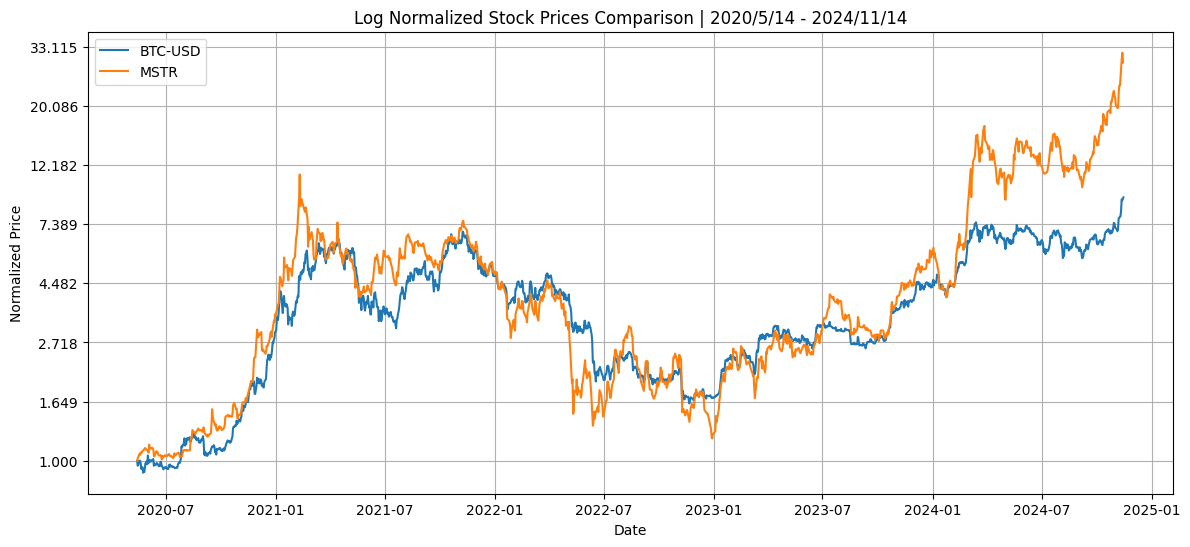

BTC-USD / MSTR correlation:0.86695606


In [3]:
assets = plotting.compare_assets(
    [
        'BTC-USD',
        'MSTR',
    ],
    start_date=[2020, 5, 14],
    end_date=[2024, 11, 14],
    log_scale=True,
)

In [9]:
btc = assets[0][1]
mstr = assets[1][1]
z_score_val = indicators.z_score(btc, mstr)
data = pd.DataFrame()
data['BTC'] = btc['Close']
data['MSTR'] = mstr['Close']
data['Z_Score'] = z_score_val
data.dropna(inplace=True)
data

,BTC,MSTR,Z_Score
Date,,,
2020-06-18 00:00:00-04:00,"9,288.02",11.95,-0.95
2020-06-19 00:00:00-04:00,"9,332.34",11.82,-0.74
2020-06-22 00:00:00-04:00,"9,629.66",11.87,0.61
2020-06-23 00:00:00-04:00,"9,313.61",11.75,-0.81
2020-06-24 00:00:00-04:00,"9,264.81",11.44,-0.97
...,...,...,...
2024-11-06 00:00:00-05:00,"75,904.86",257.81,2.01
2024-11-07 00:00:00-05:00,"76,545.48",270.81,1.92
2024-11-08 00:00:00-05:00,"76,778.87",270.42,1.77


In [12]:
from backtesting import Backtest
from src.strategies import PairsTradingZScore

print(data)

strategy = PairsTradingZScore
strategy.low_threshold = -2
strategy.high_threshold = 2
bt_pair_a = Backtest(data, strategy, cash=5_000, commission=0.004, trade_on_close=True)
stats = bt_pair_a.run()
stats

                                BTC   MSTR  Z_Score
Date                                               
2020-06-18 00:00:00-04:00  9,288.02  11.95    -0.95
2020-06-19 00:00:00-04:00  9,332.34  11.82    -0.74
2020-06-22 00:00:00-04:00  9,629.66  11.87     0.61
2020-06-23 00:00:00-04:00  9,313.61  11.75    -0.81
2020-06-24 00:00:00-04:00  9,264.81  11.44    -0.97
...                             ...    ...      ...
2024-11-06 00:00:00-05:00 75,904.86 257.81     2.01
2024-11-07 00:00:00-05:00 76,545.48 270.81     1.92
2024-11-08 00:00:00-05:00 76,778.87 270.42     1.77
2024-11-11 00:00:00-05:00 87,955.81 340.00     3.12
2024-11-13 00:00:00-05:00 90,229.45 328.38     2.82

[1109 rows x 3 columns]


ValueError: `data` must be a pandas.DataFrame with columns 'Open', 'High', 'Low', 'Close', and (optionally) 'Volume'